# Importing Libraries & Loading Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('02-15-2018.csv')
df.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,15/02/2018 08:25:18,112641158,3,0,0,0,0,0,...,0,0.0,0.000000,0,0,56320579.0,7.042784e+02,56321077,56320081,Benign
1,22,6,15/02/2018 08:29:05,37366762,14,12,2168,2993,712,0,...,32,1024353.0,649038.754495,1601183,321569,11431221.0,3.644991e+06,15617415,8960247,Benign
2,47514,6,15/02/2018 08:29:42,543,2,0,64,0,64,0,...,32,0.0,0.000000,0,0,0.0,0.000000e+00,0,0,Benign
3,0,0,15/02/2018 08:28:07,112640703,3,0,0,0,0,0,...,0,0.0,0.000000,0,0,56320351.5,3.669884e+02,56320611,56320092,Benign
4,0,0,15/02/2018 08:30:56,112640874,3,0,0,0,0,0,...,0,0.0,0.000000,0,0,56320437.0,7.198347e+02,56320946,56319928,Benign


# Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 80 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Dst Port           1048575 non-null  int64  
 1   Protocol           1048575 non-null  int64  
 2   Timestamp          1048575 non-null  object 
 3   Flow Duration      1048575 non-null  int64  
 4   Tot Fwd Pkts       1048575 non-null  int64  
 5   Tot Bwd Pkts       1048575 non-null  int64  
 6   TotLen Fwd Pkts    1048575 non-null  int64  
 7   TotLen Bwd Pkts    1048575 non-null  int64  
 8   Fwd Pkt Len Max    1048575 non-null  int64  
 9   Fwd Pkt Len Min    1048575 non-null  int64  
 10  Fwd Pkt Len Mean   1048575 non-null  float64
 11  Fwd Pkt Len Std    1048575 non-null  float64
 12  Bwd Pkt Len Max    1048575 non-null  int64  
 13  Bwd Pkt Len Min    1048575 non-null  int64  
 14  Bwd Pkt Len Mean   1048575 non-null  float64
 15  Bwd Pkt Len Std    1048575 non-n

In [4]:
df['Label'].unique()

array(['Benign', 'DoS attacks-GoldenEye', 'DoS attacks-Slowloris'],
      dtype=object)

In [5]:
df.isnull().sum()

Dst Port         0
Protocol         0
Timestamp        0
Flow Duration    0
Tot Fwd Pkts     0
                ..
Idle Mean        0
Idle Std         0
Idle Max         0
Idle Min         0
Label            0
Length: 80, dtype: int64

In [6]:
df.describe()

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,...,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,7.392499e+03,9.518465e+00,1.430739e+07,5.145998e+00,6.419784e+00,4.354262e+02,4.925884e+03,1.514397e+02,1.397992e+01,4.472574e+01,...,1.882254e+00,1.659039e+01,1.122396e+05,4.836921e+04,1.817948e+05,8.320523e+04,4.347475e+06,2.658500e+05,4.616676e+06,4.109270e+06
std,1.753869e+04,5.303721e+00,3.335503e+07,3.379921e+01,9.786280e+01,2.881334e+04,1.399474e+05,2.774302e+02,2.382720e+01,6.052267e+01,...,5.656394e+00,7.476644e+00,9.456190e+05,3.772539e+05,1.205154e+06,8.678863e+05,1.422425e+07,2.349741e+06,1.486555e+07,1.398498e+07
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.300000e+01,6.000000e+00,4.130000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,8.000000e+01,6.000000e+00,3.689600e+04,2.000000e+00,1.000000e+00,4.400000e+01,9.900000e+01,4.100000e+01,0.000000e+00,3.600000e+01,...,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.450000e+02,1.700000e+01,3.377079e+06,5.000000e+00,4.000000e+00,3.330000e+02,4.880000e+02,1.610000e+02,3.500000e+01,5.366667e+01,...,1.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,6.553400e+04,1.700000e+01,1.200000e+08,9.021000e+03,1.918100e+04,8.737314e+06,2.790523e+07,6.444000e+04,1.460000e+03,1.652931e+04,...,1.468000e+03,5.600000e+01,1.119924e+08,6.017711e+07,1.119924e+08,1.119924e+08,1.199915e+08,7.251285e+07,1.199915e+08,1.199915e+08


In [7]:
df.columns

Index(['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
      

# Feature Selection

In [8]:
import xgboost as xg
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [9]:
X = df.drop(columns = ['Label', 'Timestamp'], axis = 1)
y = df['Label']

In [10]:
X

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,0,0,112641158,3,0,0,0,0,0,0.000000,...,0,0,0.0,0.000000,0,0,56320579.0,7.042784e+02,56321077,56320081
1,22,6,37366762,14,12,2168,2993,712,0,154.857143,...,8,32,1024353.0,649038.754495,1601183,321569,11431221.0,3.644991e+06,15617415,8960247
2,47514,6,543,2,0,64,0,64,0,32.000000,...,0,32,0.0,0.000000,0,0,0.0,0.000000e+00,0,0
3,0,0,112640703,3,0,0,0,0,0,0.000000,...,0,0,0.0,0.000000,0,0,56320351.5,3.669884e+02,56320611,56320092
4,0,0,112640874,3,0,0,0,0,0,0.000000,...,0,0,0.0,0.000000,0,0,56320437.0,7.198347e+02,56320946,56319928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,50111,6,22,3,0,31,0,31,0,10.333333,...,1,20,0.0,0.000000,0,0,0.0,0.000000e+00,0,0
1048571,443,6,54682783,5,1,123,46,46,0,24.600000,...,2,20,158783.0,0.000000,158783,158783,54523813.0,0.000000e+00,54523813,54523813
1048572,443,6,53682093,5,1,123,46,46,0,24.600000,...,2,20,259719.0,0.000000,259719,259719,53421756.0,0.000000e+00,53421756,53421756
1048573,443,6,54683364,5,1,123,46,46,0,24.600000,...,2,20,158870.0,0.000000,158870,158870,54523593.0,0.000000e+00,54523593,54523593


In [11]:
encoder = LabelEncoder()

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((838860, 78), (209715, 78), (838860,), (209715,))

In [13]:
X_train

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
408561,3389,6,3744015,9,11,1171,1674,661,0,130.111111,...,6,20,0.0,0.0,0,0,0.0,0.0,0,0
70143,53,17,246346,1,1,36,52,36,36,36.000000,...,0,8,0.0,0.0,0,0,0.0,0.0,0,0
708782,53,17,34692,2,2,72,328,36,36,36.000000,...,1,8,0.0,0.0,0,0,0.0,0.0,0,0
572694,53,17,18558,1,1,52,108,52,52,52.000000,...,0,8,0.0,0.0,0,0,0.0,0.0,0,0
774181,53,17,461,1,1,47,175,47,47,47.000000,...,0,8,0.0,0.0,0,0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,63663,6,39,2,0,0,0,0,0,0.000000,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
365838,80,6,869,3,4,161,488,161,0,53.666667,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0
131932,80,6,54674359,2,0,0,0,0,0,0.000000,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
671155,53,17,161290,2,2,138,302,69,69,69.000000,...,1,8,0.0,0.0,0,0,0.0,0.0,0,0


In [14]:
original_feature_names = X_train.columns
original_feature_names

Index(['Dst Port', 'Protocol', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts',
       'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
       'Fwd Seg Siz

In [15]:
X_train = pd.DataFrame(X_train).apply(pd.to_numeric, errors='coerce').values
X_test = pd.DataFrame(X_test).apply(pd.to_numeric, errors='coerce').values

print("Infinities in X_train:", np.isinf(X_train).sum())
print("Infinities in X_test:", np.isinf(X_test).sum())

threshold = 1e+100
print("Large values in X_train:", (np.abs(X_train) > threshold).sum())
print("Large values in X_test:", (np.abs(X_test) > threshold).sum())

Infinities in X_train: 8890
Infinities in X_test: 2243
Large values in X_train: 8890
Large values in X_test: 2243


In [16]:
X_train

array([[3.3890000e+03, 6.0000000e+00, 3.7440150e+06, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [5.3000000e+01, 1.7000000e+01, 2.4634600e+05, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [5.3000000e+01, 1.7000000e+01, 3.4692000e+04, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [8.0000000e+01, 6.0000000e+00, 5.4674359e+07, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [5.3000000e+01, 1.7000000e+01, 1.6129000e+05, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [5.3000000e+01, 1.7000000e+01, 1.5520000e+03, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]])

In [17]:
X_train[np.isinf(X_train)] = np.nan
X_test[np.isinf(X_test)] = np.nan

print("Infinities in X_train:", np.isinf(X_train).sum())
print("Infinities in X_test:", np.isinf(X_test).sum())

print("Large values in X_train:", (np.abs(X_train) > threshold).sum())
print("Large values in X_test:", (np.abs(X_test) > threshold).sum())

Infinities in X_train: 0
Infinities in X_test: 0
Large values in X_train: 0
Large values in X_test: 0


In [18]:
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [19]:
X_train = pd.DataFrame(X_train, columns=original_feature_names)
X_test = pd.DataFrame(X_test, columns=original_feature_names)

In [20]:
X_train

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,3389.0,6.0,3744015.0,9.0,11.0,1171.0,1674.0,661.0,0.0,130.111111,...,6.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,53.0,17.0,246346.0,1.0,1.0,36.0,52.0,36.0,36.0,36.000000,...,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,53.0,17.0,34692.0,2.0,2.0,72.0,328.0,36.0,36.0,36.000000,...,1.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,53.0,17.0,18558.0,1.0,1.0,52.0,108.0,52.0,52.0,52.000000,...,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,53.0,17.0,461.0,1.0,1.0,47.0,175.0,47.0,47.0,47.000000,...,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838855,63663.0,6.0,39.0,2.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
838856,80.0,6.0,869.0,3.0,4.0,161.0,488.0,161.0,0.0,53.666667,...,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
838857,80.0,6.0,54674359.0,2.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
838858,53.0,17.0,161290.0,2.0,2.0,138.0,302.0,69.0,69.0,69.000000,...,1.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
y_train = encoder.fit_transform(y_train)
print(y_train)

[0 0 0 ... 0 0 0]


In [22]:
X_train

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,3389.0,6.0,3744015.0,9.0,11.0,1171.0,1674.0,661.0,0.0,130.111111,...,6.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,53.0,17.0,246346.0,1.0,1.0,36.0,52.0,36.0,36.0,36.000000,...,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,53.0,17.0,34692.0,2.0,2.0,72.0,328.0,36.0,36.0,36.000000,...,1.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,53.0,17.0,18558.0,1.0,1.0,52.0,108.0,52.0,52.0,52.000000,...,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,53.0,17.0,461.0,1.0,1.0,47.0,175.0,47.0,47.0,47.000000,...,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838855,63663.0,6.0,39.0,2.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
838856,80.0,6.0,869.0,3.0,4.0,161.0,488.0,161.0,0.0,53.666667,...,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
838857,80.0,6.0,54674359.0,2.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
838858,53.0,17.0,161290.0,2.0,2.0,138.0,302.0,69.0,69.0,69.000000,...,1.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
model = xg.XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [24]:
importance = model.get_booster().get_score(importance_type='weight')
importance_df = pd.DataFrame(list(importance.items()), columns=['Feature02', 'Importance02'])
importance_df = importance_df.sort_values(by = 'Importance02', ascending = False)
importance_df.to_csv('File02_XG.csv',  index = False)
importance_df

,Feature02,Importance02
42,Init Fwd Win Byts,229.0
0,Dst Port,227.0
45,Fwd Seg Size Min,212.0
36,FIN Flag Cnt,101.0
18,Flow IAT Min,72.0
23,Fwd IAT Min,64.0
6,Fwd Pkt Len Max,42.0
33,Pkt Len Max,42.0
1,Flow Duration,39.0
32,Bwd Pkts/s,39.0


<Figure size 1000x600 with 0 Axes>

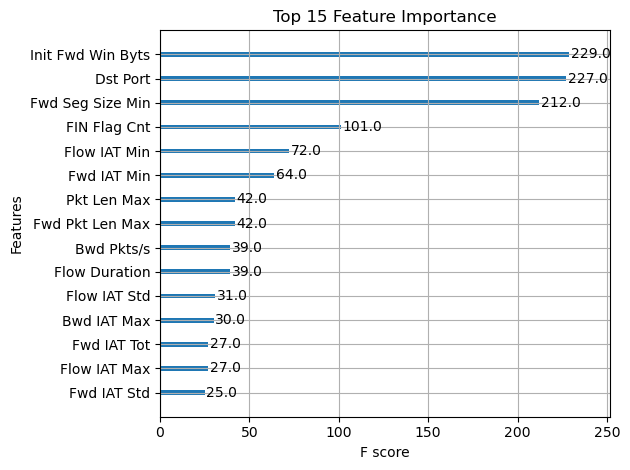

In [25]:
plt.figure(figsize=(10, 6))
xg.plot_importance(model, importance_type='weight', max_num_features = 15)
plt.title('Top 15 Feature Importance')
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [26]:
labels = df['Label'].unique()

In [27]:
labels

array(['Benign', 'DoS attacks-GoldenEye', 'DoS attacks-Slowloris'],
      dtype=object)